<a href="https://colab.research.google.com/github/G1290-hik/ML-5th-Semester/blob/main/BFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Necessary Imports
import time
import networkx as nx
import matplotlib.pyplot as plt

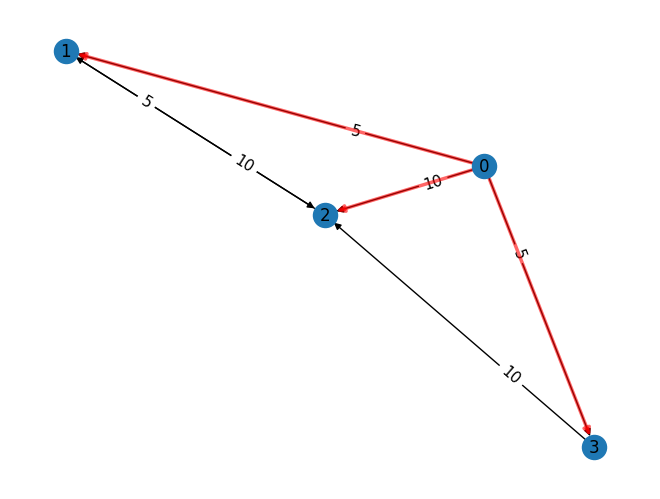

In [ ]:
# BFS traversal
def BFS(G, source, pos):
    visited = [False]*(len(G.nodes()))
    queue = []  # a queue for BFS traversal
    queue.append(source)
    visited[source] = True
    edges_to_draw = []  # to store edges to be drawn

    while queue:
        curr_node = queue.pop(0)
        for i in G[curr_node]:  # iterates through all the possible vertices adjacent to the curr_node
            if visited[i] == False:
                queue.append(i)
                visited[i] = True
                edges_to_draw.append((curr_node, i))  # add edge to be drawn

    # draw BFS traversal edges
    nx.draw_networkx_edges(G, pos, edgelist=edges_to_draw, width=2.5, alpha=0.6, edge_color='r')
    return

# takes input from the file and creates a weighted graph
def CreateGraph():
    G = nx.DiGraph()
    with open('/content/input.txt') as f:
        n = int(f.readline())
        wtMatrix = []
        for i in range(n):
            list1 = list(map(int, (f.readline()).split()))
            wtMatrix.append(list1)
        source = int(f.readline())  # source vertex from where BFS has to start

    # Adds edges along with their weights to the graph
    for i in range(n):
        for j in range(len(wtMatrix[i])):
            if wtMatrix[i][j] > 0:
                G.add_edge(i, j, length=wtMatrix[i][j])
    return G, source
# draws the graph and displays the weights on the edges
def DrawGraph(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)  # with_labels=True is to show the node number in the output graph
    edge_labels = dict([((u, v,), d['length']) for u, v, d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3, font_size=11)  # prints weight on all the edges
    return pos
# main function
if __name__ == "__main__":
    G, source = CreateGraph()
    pos = DrawGraph(G)
    BFS(G, source, pos)
    plt.show()